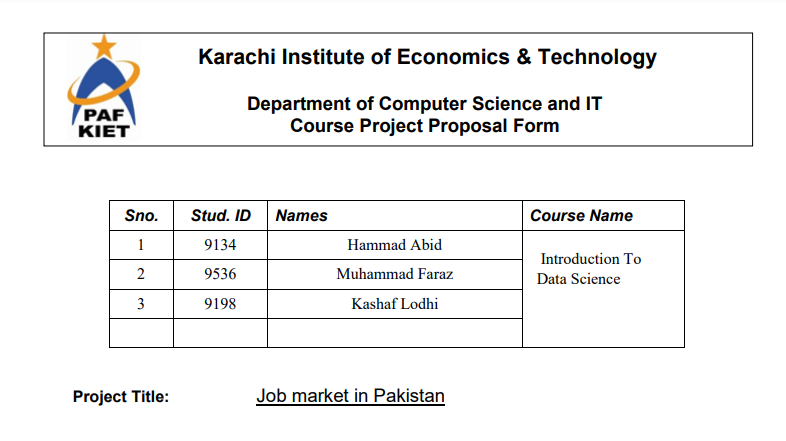

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
%matplotlib inline
sns.set_style('darkgrid')

In [60]:
df = pd.read_csv("Pakistan_Available_Job.csv")
df.head()

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21


In [63]:
df['label'].value

3

In [3]:
df.tail()

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
6675,Full Time Senior Software Engineer Job in Pak...,NaN,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20
6676,Full Time Commercial Experience Executive Job ...,NaN,NaN,Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20
6677,Full Time Business Development Executive Job i...,NaN,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,NaN,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20
6679,Full Time Bidding Expert / Social Media Market...,NaN,"Super Duper Studio , Pakistan",Full Time Jobs,Job for Fresh Graduates,Computer Software Jobs,Candidate Shall Be Expert in Getting Work from...,Lahore,29-Dec-20


In [4]:
df.shape

(6680, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job Name             6680 non-null   object
 1   label                1115 non-null   object
 2   Company Name         6017 non-null   object
 3   Job Type             6680 non-null   object
 4   Experience Required  6680 non-null   object
 5   Department           6680 non-null   object
 6   JD                   6680 non-null   object
 7   City                 6680 non-null   object
 8   Date Posted          6680 non-null   object
dtypes: object(9)
memory usage: 469.8+ KB


In [6]:
df.isna().sum()

Job Name                  0
label                  5565
Company Name            663
Job Type                  0
Experience Required       0
Department                0
JD                        0
City                      0
Date Posted               0
dtype: int64

In [7]:
df.fillna(method='ffill',inplace = True)
df.isna().sum()

Job Name               0
label                  0
Company Name           0
Job Type               0
Experience Required    0
Department             0
JD                     0
City                   0
Date Posted            0
dtype: int64

In [8]:
df_groupby_label = df.groupby('label')
df_groupby_label.size()

label
Gallery Job    5065
Hot Job        1036
Premium Job     579
dtype: int64

In [64]:
df['Result'] = 1
df['Result'] = np.where((df.label == 'Hot Job'),'2',df.Result)
df['Result'] = np.where((df.label == 'Premium Job'),'3',df.Result)
df

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted,Result
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21,3
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21,3
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21,3
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21,3
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21,3
...,...,...,...,...,...,...,...,...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,NaN,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20,1
6676,Full Time Commercial Experience Executive Job ...,NaN,NaN,Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20,1
6677,Full Time Business Development Executive Job i...,NaN,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20,1
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,NaN,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20,1


# Now We Know That
## <center>Gallery Job = 1</center>
## <center>Hot Job = 2</center>
## <center>Premium Job = 3</center>

# Exploratory Data Analysis
Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

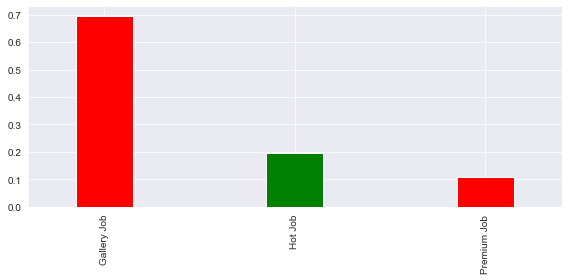

In [65]:
fig, axes = plt.subplots(figsize=(8, 4))
df['label'].value_counts(normalize=True).plot.bar(width=0.3, color=('red','green',))

plt.tight_layout()
plt.show()

In [66]:
df = df.rename(columns={
    'Job Name': 'Job_Name',
    'Company Name': 'Company_Name',
    'Job Type': 'Job_Type',
    'Experience Required': 'Experience_Required',
    'Date Posted': 'Date_Posted'
})
df.head()

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,Result
0,"Full Time New Job Positions .Net, .Netcore, Fl...",Premium Job,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21,3
1,Full Time Senior Web Developer Jobs in Pakistan,Premium Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21,3
2,Full Time Russian Speakers Jobs in Pakistan,Premium Job,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21,3
3,Full Time Customer Support Specialist - Intern...,Premium Job,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21,3
4,Full Time English Speaker - International Busi...,Premium Job,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21,3


In [67]:
df['Job_Name'].count()

6680

In [68]:
a = df['Job_Name'].unique().tolist()
b = a[0].split(',')
b

['Full Time New Job Positions .Net',
 ' .Netcore',
 ' Flutter',
 ' Tea Boy Jobs in Pakistan']

<AxesSubplot:xlabel='count'>

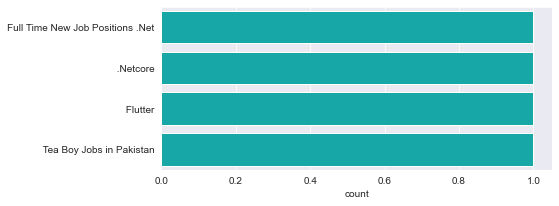

In [14]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y=b, data=df, color='c')

In [15]:
top_com = df['Company_Name'].unique()
top_com[0:5]

array(['Nayel Solutions, Pakistan',
       'Eurosoft Tech Private Limited, Pakistan', 'ICM JAPAN, Pakistan',
       'ibex, Pakistan', 'Uni Hosiery Co. Inc., Pakistan'], dtype=object)

In [16]:
data_scientis_jobs = df[ df['Job_Name'].str.contains('Data Scientist')]
data_scientis_jobs

,Job_Name,label,Company_Name,Job_Type,Experience_Required,Department,JD,City,Date_Posted,Result
215,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,Finance Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,28-Jan-21,1
240,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,IT Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,23-Jan-21,1
486,Online Full Time Data Scientist Job in Pakistan,Gallery Job,"Suvastutech Ltd., Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,Engage with business teams to find opportuniti...,Swat,2-Mar-21,1
1859,Full Time Data Scientists Job in Pakistan,Gallery Job,"2iQ Research GmbH, Pakistan",Full Time Job,3 Years Job Exp.,IT Job,Pre-Processing the raw data.Exploratory Data A...,Lahore,6-Nov-20,1
4496,Full Time Chief Data Scientist Job in Pakistan,Hot Job,"Mushawar UK Ltd, Pakistan",Full Time Job,8 Years Job Exp.,IT Job,We are looking for a Chief Data Scientist to l...,Lahore,27-Feb-20,2
5615,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,Finance Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,28-Jan-21,1
5640,Full Time Trainee Data Scientist Job in Pakistan,Gallery Job,"Eurosoft Tech Private Limited, Pakistan",Full Time Job,2 Years Job Exp.,IT Job,What is a Trainee Data Scientist?Jazz wants to...,Islamabad,23-Jan-21,1
5886,Online Full Time Data Scientist Job in Pakistan,Gallery Job,"Suvastutech Ltd., Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,Engage with business teams to find opportuniti...,Swat,2-Mar-21,1


In [17]:
data_scientis_jobs['Job_Name'].count()

8

Text(0.5, 0, 'Experience')

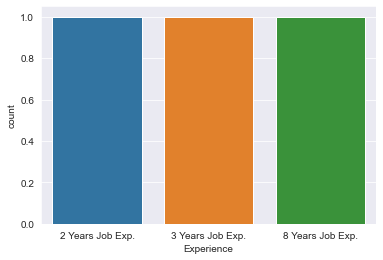

In [18]:
e = data_scientis_jobs['Experience_Required'].unique()
sns.countplot(x = e, data = df)
plt.xlabel('Experience')

Text(0.5, 0, 'City')

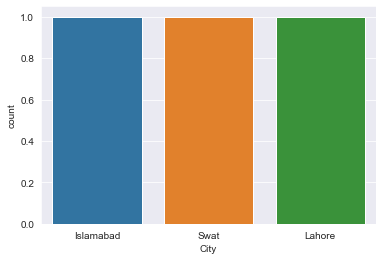

In [19]:
c = data_scientis_jobs['City'].unique()
sns.countplot(x = c, data = df)
plt.xlabel('City')

# DATA ANALYSIS OF PAKISTAN DATA

In [20]:
pak_df = df['Job_Type'].value_counts()
pak_df

Full Time Job     3821
Full Time Jobs    2859
Name: Job_Type, dtype: int64

### Here above we have found a regex error so we will solve it first

In [21]:
df['Job_Type'].replace('s+','',inplace=True,regex=True)
pak_df = df['Job_Type'].value_counts()
pak_df

Full Time Job    6680
Name: Job_Type, dtype: int64

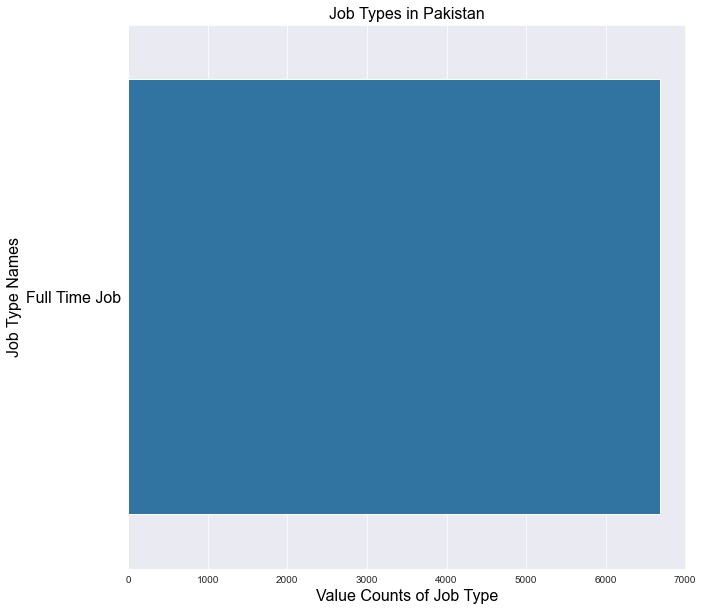

In [22]:
plt.figure(figsize=(10,10))
res=sns.barplot(x=pak_df, y=pak_df.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Job Type',fontsize = 16, color='black')
plt.ylabel('Job Type Names',fontsize = 16, color='black')
plt.title('Job Types in Pakistan',fontsize = 16, color='black')
plt.show()

In [23]:
#How many years of experienced required for job
pak_df = df['Experience_Required'].value_counts()
pak_df

2 Years Job Exp.           1635
< 1 Year                   1591
1 Year Job Exp.            1418
3 Years Job Exp.            789
Job for Fresh Graduates     449
5 Years Job Exp.            323
4 Years Job Exp.            210
Job for Students            142
10 Years Job Exp.            36
8 Years Job Exp.             29
6 Years Job Exp.             28
7 Years Job Exp.             18
15 Years Job Exp.             6
9 Years Job Exp.              2
12 Years Job Exp.             2
25 Years Job Exp.             1
14 Years Job Exp.             1
Name: Experience_Required, dtype: int64

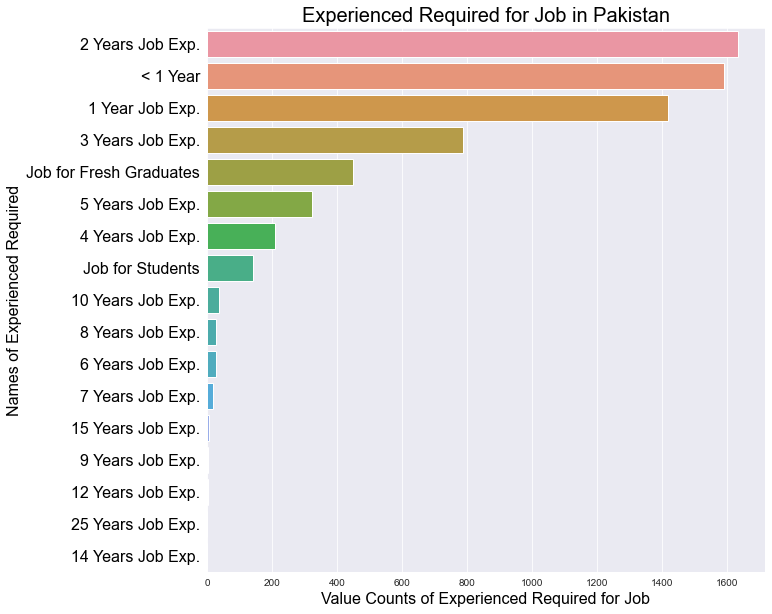

In [24]:
plt.figure(figsize=(10,10))
res=sns.barplot(x=pak_df, y=pak_df.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Experienced Required for Job', fontsize = 16, color='black')
plt.ylabel('Names of Experienced Required', fontsize = 16, color='black')
plt.title('Experienced Required for Job in Pakistan', fontsize = 20, color='black')
plt.show()

In [25]:
#How many Jobs are available in each departments.
pak_df_Dept = df['Department'].value_counts().head(15)
pak_df_Dept

IT Job                    820
IT Jobs                   591
Computer Software Job     475
Computer Software Jobs    406
Customer Service Jobs     400
Web & E-commerce Job      315
Sales Jobs                265
Marketing Job             265
Web & E-commerce Jobs     262
Admin Job                 260
Sales Job                 236
Marketing Jobs            154
Engineering Job           150
Customer Service Job      113
Production Job             96
Name: Department, dtype: int64

### Here above we have found a regex error so we will solve it first

In [26]:
df['Department'].replace('s+','',inplace=True,regex=True)
pak_df_Dept = df['Department'].value_counts().head(15)
pak_df_Dept

IT Job                   1411
Computer Software Job     881
Web & E-commerce Job      577
Cutomer Service Job       513
Sale Job                  501
Marketing Job             419
Admin Job                 280
Engineering Job           208
Telecom Job               132
Education Job             132
Finance Job               124
Production Job            118
Real Etate Job            106
Healthcare Job            101
Accounting Job             98
Name: Department, dtype: int64

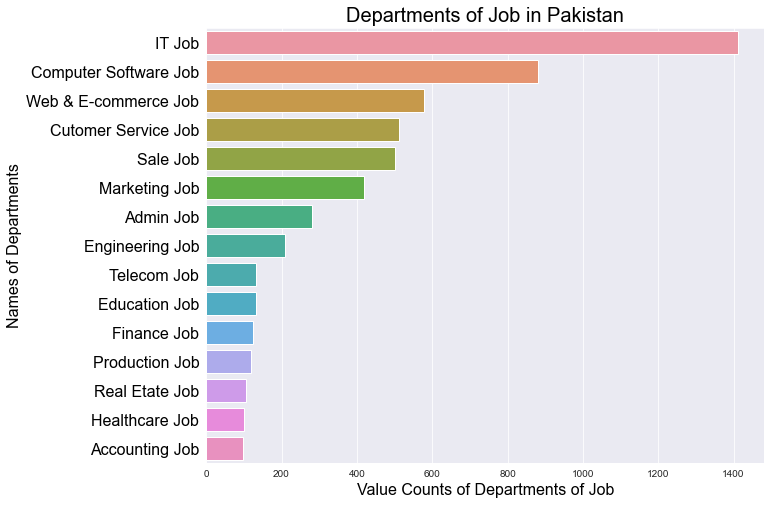

In [27]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=pak_df_Dept, y=pak_df_Dept.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Departments of Job', fontsize = 16, color='black')
plt.ylabel('Names of Departments', fontsize = 16, color='black')
plt.title('Departments of Job in Pakistan', fontsize = 20, color='black')
plt.show()

In [28]:
#How many Jobs are available in each city.
pak_df_City = df['City'].value_counts().head(15)
pak_df_City

Lahore        2046
Islamabad     1921
Karachi       1700
Faisalabad     222
Sialkot        123
Rawalpindi     120
Hyderabad       74
Multan          68
Gujranwala      62
Peshawar        38
Abbottabad      33
Bahawalpur      21
Gujrat          17
Attock          14
Wah             10
Name: City, dtype: int64

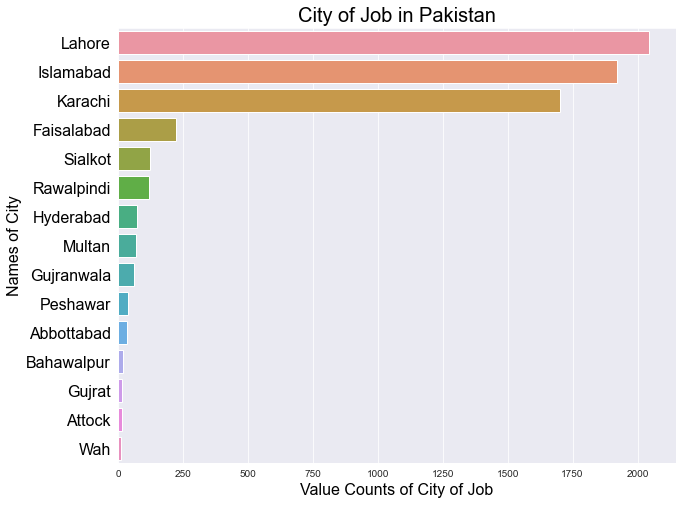

In [29]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=pak_df_City, y=pak_df_City.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of City of Job', fontsize = 16, color='black')
plt.ylabel('Names of City', fontsize = 16, color='black')
plt.title('City of Job in Pakistan', fontsize = 20, color='black')
plt.show()

In [30]:
#How many Jobs are Posted in each dates.
pak_df_Date = df['Date_Posted'].value_counts().head(10)
pak_df_Date

23-Feb-21    134
22-Feb-21    116
28-Jan-21     86
12-Feb-21     74
15-Mar-21     70
21-Jan-21     68
27-Jan-21     68
23-Jan-21     68
6-Jan-21      66
26-Feb-21     62
Name: Date_Posted, dtype: int64

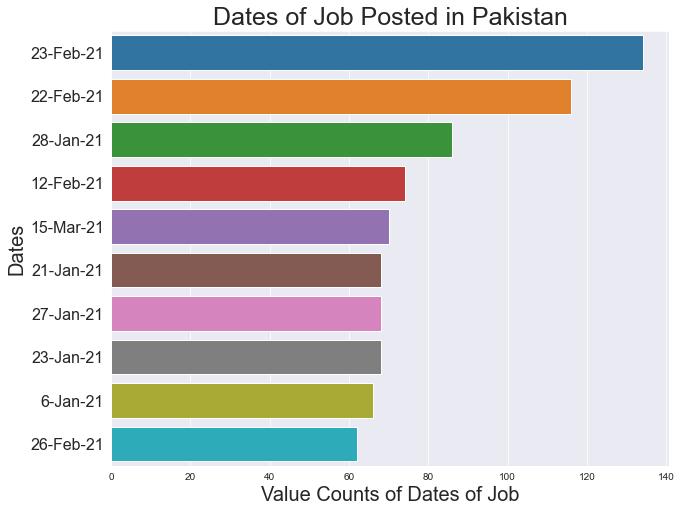

In [31]:
plt.figure(figsize=(10,8))
res=sns.barplot(x=pak_df_Date, y=pak_df_Date.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.xlabel('Value Counts of Dates of Job', fontsize = 20)
plt.ylabel('Dates', fontsize = 20)
plt.title('Dates of Job Posted in Pakistan', fontsize = 25)
plt.show()

### Before converting string data we will drop 'Date_Posted','Job_Type','City','Experience_Required','Job_Name' and 'label' columns because there is no need of it to predict the job category

In [32]:
df = df.drop(['Date_Posted','Job_Type','City','Experience_Required','Job_Name','label'], axis = 1)
df

,Company_Name,Department,JD,Result
0,"Nayel Solutions, Pakistan",IT Job,"New Job Positions .net, .netcore, flutter, Tea...",3
1,"Eurosoft Tech Private Limited, Pakistan",IT Job,We are looking for an experienced Web Develope...,3
2,"ICM JAPAN, Pakistan",Cutomer Service Job,International clients dealing exposure (B2B).S...,3
3,"ibex, Pakistan",Cutomer Service Job,Responsible for acting as a liaison between ou...,3
4,"ICM JAPAN, Pakistan",Cutomer Service Job,International clients dealing exposure (B2B) a...,3
...,...,...,...,...
6675,"KnovaSol, Pakistan",Computer Software Job,We required services of Senior Software Engine...,1
6676,"KnovaSol, Pakistan",Admin Job,As one of the leading employers in the country...,1
6677,"Loop Brackets, Pakistan",Computer Software Job,The ideal candidate will have experience in al...,1
6678,"Super Duper Studio , Pakistan",Computer Software Job,Must be able to create 3D Game Environments an...,1


In [33]:
Y = df['Result']
X = df.drop('Result', axis=1)
X

,Company_Name,Department,JD
0,"Nayel Solutions, Pakistan",IT Job,"New Job Positions .net, .netcore, flutter, Tea..."
1,"Eurosoft Tech Private Limited, Pakistan",IT Job,We are looking for an experienced Web Develope...
2,"ICM JAPAN, Pakistan",Cutomer Service Job,International clients dealing exposure (B2B).S...
3,"ibex, Pakistan",Cutomer Service Job,Responsible for acting as a liaison between ou...
4,"ICM JAPAN, Pakistan",Cutomer Service Job,International clients dealing exposure (B2B) a...
...,...,...,...
6675,"KnovaSol, Pakistan",Computer Software Job,We required services of Senior Software Engine...
6676,"KnovaSol, Pakistan",Admin Job,As one of the leading employers in the country...
6677,"Loop Brackets, Pakistan",Computer Software Job,The ideal candidate will have experience in al...
6678,"Super Duper Studio , Pakistan",Computer Software Job,Must be able to create 3D Game Environments an...


# converting string data to numeric using one hot Encoding

In [34]:
X = pd.get_dummies(X)
X.head()

,"Company_Name_# Maker Solutions, Pakistan","Company_Name_1 Key Solution, Pakistan","Company_Name_1 Plate 2 Spoon, Pakistan","Company_Name_1stFold, Pakistan","Company_Name_2 C Health Solutions, Pakistan","Company_Name_2 Do, Pakistan","Company_Name_24/7 Support, Pakistan","Company_Name_2B Vision Technologies, Pakistan","Company_Name_2Rtec (Pvt.) Ltd, Pakistan","Company_Name_2Zee Business Solution, Pakistan",...,"JD_tossdown is looking for a PHP developer. Ideal candidate should have 3-4 years of experience in the same field.Technologies:php, mysql, javascript, linux, should have experience in making database architecture, gitRest APIs, TokenizationKnowledge of",JD_tossdown technologies is looking for a mature and experienced *React js developer* urgently who will work with us on long term basis. The selected candidate will get a chance to work on international projects with a great team.Please apply only if yo,JD_we are hiringWe are looking for services of a Real Estate\nSale executive must have experience in real estate industryLocation bahria town islamabad,JD_we are lookinf for SEO agent who must have following SEO skillsOptimizing copy and landing pages for search engine optimizationPerforming ongoing keyword research including discovery and expansion of keyword opportunitiesResearching and implementing,"JD_we are looking for a Content Writer to join our team and enrich our websites with new blog posts, guides and marketing copy.Content Writer responsibilities include conducting thorough research on industry-related topics, generating ideas fo","JD_we are looking for an Import Officer / Export Female OfficerFollow up import and export shipmentCoordinate with Oversea, Carrier, Shipping agent and Freight forwarder.Prepare the Documents and LC for import &amp; Export of material and stock and coor",JD_we are looking for an iOS developer responsible for the development and maintenance of applications aimed at a range of iOS devices including mobile phones and tablet computers. Your primary focus will be development of iOS applications and their,"JD_we are looking for fresh and newly graduates for the followingn posts.1) Graphic designer 2) Content writer 3) Seo Specialsit 4) phone call operator Peek International, is an IT services provider co",JD_we need mvc devlopers we atleast two years of experience. Must possess following skills:ASP.net MVC,"JD_xperienced Fullstack Javascript web &amp; React Native Engineer interested in building web apps, backend as well as mobile apps on both the iOS and Android platforms.ResponsibilitiesArchitect, build and maintain excellent JS &amp; React Native applic"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=(0))
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [52]:
Logreg_predict = logreg.predict(X_test)
print("Prediction Using Logistic Regression on test set: {}".format(Logreg_predict))
Difference = pd.DataFrame({'Actual value': Y_test, 'Predicted value': Logreg_predict})
Difference

Prediction Using Logistic Regression on test set: ['1' '1' '1' ... '1' '2' '1']


,Actual value,Predicted value
5151,1,1
3242,1,1
4809,2,1
472,1,1
444,1,1
...,...,...
1082,3,1
1824,1,1
1361,1,1
3350,2,2


In [55]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [56]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(X_train,Y_train)

KNeighborsClassifier()

In [57]:
y_pred = kc.predict(X_test)
print('Accuracy of KNeighbors classifier on test set: {:.2f}'.format(kc.score(X_test, Y_test)))

Accuracy of KNeighbors classifier on test set: 0.76


In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.96      0.86      1516
           2       0.49      0.18      0.26       301
           3       0.61      0.09      0.16       187

    accuracy                           0.76      2004
   macro avg       0.62      0.41      0.43      2004
weighted avg       0.72      0.76      0.71      2004

